In [2]:
!pwd
!ls -al

/home/ec2-user/datakind
total 975624
drwxrwxr-x  3 ec2-user ec2-user      4096 Mar 29 05:09 .
drwx------ 14 ec2-user ec2-user      4096 Mar 28 22:26 ..
-rw-rw-r--  1 ec2-user ec2-user        72 Mar 29 05:09 DataKind_Evaluations.ipynb
-rw-rw-r--  1 ec2-user ec2-user    408976 Mar 29 05:09 DataKind.ipynb
drwxr-xr-x  2 ec2-user ec2-user      4096 Mar 29 05:09 .ipynb_checkpoints
-rw-rw-r--  1 ec2-user ec2-user       141 Mar 29 04:27 log_loss_scores.p
-rw-rw-r--  1 ec2-user ec2-user 641039005 Mar 29 04:27 y_predicted_probas.p
-rw-rw-r--  1 ec2-user ec2-user 357563915 Mar 29 04:27 y_tests.p


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, log_loss
from sklearn.cross_validation import train_test_split
from sklearn import cluster
from sklearn.decomposition import PCA
from scipy.stats import itemfreq
from mpl_toolkits.mplot3d import Axes3D
import pickle

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
%matplotlib inline

In [5]:
temp = open('log_loss_scores.p', 'rb')
log_loss_scores = pickle.load(temp)

In [7]:
temp = open('y_predicted_probas.p', 'rb')
y_predicted_probas  = pickle.load(temp)

In [8]:
temp = open('y_tests.p', 'rb')
y_tests  = pickle.load(temp)

In [24]:
y_tests[0].sum()

36.0

In [26]:
def makeDF(i, col):
    return pd.DataFrame(zip( y_tests[i],y_predicted_probas[i][:,1])).sort(columns = col, ascending = False)

In [33]:
makeDF(1,1).head(5)

,0,1
3422,0,0.884
5788,1,0.826
19631,0,0.812
31839,0,0.808
29547,1,0.776


In [34]:

y_predicted_probas[0][:,1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [35]:
pd.DataFrame(zip( y_tests[0],y_predicted_probas[0][:,1])).sort(columns = 1, ascending = False).head()

,0,1
1195,0,0.438112
28967,0,0.382000
3953,0,0.304351
27611,0,0.304351
30133,0,0.274000


In [45]:
df_proba = pd.DataFrame(range(0,len(y_tests[0])))

df_test = pd.DataFrame(range(0,len(y_tests[0])))

In [42]:
len(y_tests)

337

In [46]:
for i in range(0,len(y_tests)):
    name = 'proba ' + str(i)
    df_proba[name] = y_predicted_probas[i][:,1]
    


In [48]:
for i in range(0,len(y_tests)):
    name = 'test ' + str(i)
    df_test[name] = y_tests[i]

In [101]:
df_test = df_test.ix[:,1:]

In [102]:
df_proba = df_proba.ix[:,1:]

In [108]:
Of5 = []

In [119]:
Of10 = []

In [120]:
%%time
for i in df_test.index:
    temp_zip = zip(df_test.ix[i].values, df_proba.ix[i].values)
    temp_df = pd.DataFrame(temp_zip).sort(columns = 1, ascending = False)
    Of10.append(temp_df.head(10).sum()[0])

CPU times: user 47.4 s, sys: 32 ms, total: 47.5 s
Wall time: 47.5 s


In [118]:
(sum(Of5) / 5) / len(Of5)

0.12650489826676714

In [125]:
sum(Of10) / 10 / len(Of10)

0.094652599849284091

In [129]:
items5 = []

In [132]:
%%time
for i in df_test.index:
    temp_zip = zip(df_test.ix[i].values, df_proba.ix[i].values)
    temp_df = pd.DataFrame(temp_zip).sort(columns = 1, ascending = False)
    for idx in temp_df.head(5).index:
        items5.append(idx)

CPU times: user 41.8 s, sys: 88 ms, total: 41.9 s
Wall time: 41.9 s


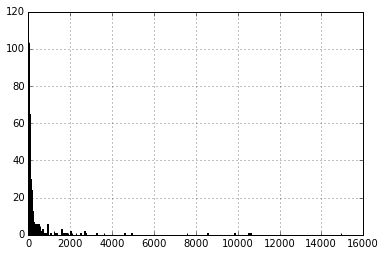

In [139]:
pd.DataFrame(items5)[0].value_counts().hist(bins = 400)

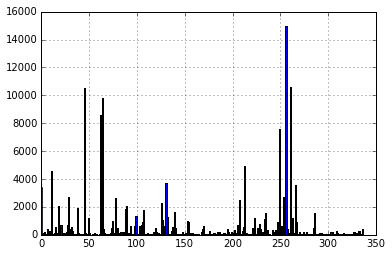

In [152]:
pd.DataFrame(items5)[0].order().hist(bins=300)